Downloaded seurat object, transfer from rdm to scratch

``` bash
rsync -azvhp /QRISdata/Q5935/nikita/scdata/PRJCA005422/ /scratch/user/s4436039/scdata/PRJCA005422 
```

##### Steps for reading in dataset (following download), initial QC, dim reduction/clustering and saving out the myeloid cluster for **PRJCA005422**

file downloaded:
raw_object.rds

In [3]:
#set wd
getwd()
setwd('/scratch/user/s4436039/scdata/PRJCA005422')
getwd()

[1] "/scratch/user/s4436039/Nikita-project"

[1] "/scratch/user/s4436039/scdata/PRJCA005422"

In [4]:
#Load packages
library(dplyr)
library(Seurat)
library(patchwork)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: SeuratObject

Loading required package: sp


Attaching package: ‘SeuratObject’


The following object is masked from ‘package:base’:

    intersect




In [5]:
#Load in downloaded RDS
OC <- readRDS("/scratch/user/s4436039/scdata/PRJCA005422/raw_object.rds")

In [6]:
#checking OC is already a seurat object
class(OC)

[1] "Seurat"
attr(,"package")
[1] "Seurat"

In [7]:
head(OC@meta.data) 
tail(OC@meta.data) 

orig.ident nCount_RNA nFeature_RNA
EOC1_PBMC_cell_AAACCTGAGAAGGCCT EOC1        6737      1661        
EOC1_PBMC_cell_AAACCTGAGATGCGAC EOC1       33892      4374        
EOC1_PBMC_cell_AAACCTGAGCTGTTCA EOC1        4999      1636        
EOC1_PBMC_cell_AAACCTGAGGGTCTCC EOC1        6399      1627        
EOC1_PBMC_cell_AAACCTGAGGTGCTAG EOC1        3766      1269        
EOC1_PBMC_cell_AAACCTGCAAAGGCGT EOC1        3916      1173        
                                Cellname                        Samples  
EOC1_PBMC_cell_AAACCTGAGAAGGCCT EOC1_PBMC_cell_AAACCTGAGAAGGCCT HGSOC1_BC
EOC1_PBMC_cell_AAACCTGAGATGCGAC EOC1_PBMC_cell_AAACCTGAGATGCGAC HGSOC1_BC
EOC1_PBMC_cell_AAACCTGAGCTGTTCA EOC1_PBMC_cell_AAACCTGAGCTGTTCA HGSOC1_BC
EOC1_PBMC_cell_AAACCTGAGGGTCTCC EOC1_PBMC_cell_AAACCTGAGGGTCTCC HGSOC1_BC
EOC1_PBMC_cell_AAACCTGAGGTGCTAG EOC1_PBMC_cell_AAACCTGAGGTGCTAG HGSOC1_BC
EOC1_PBMC_cell_AAACCTGCAAAGGCGT EOC1_PBMC_cell_AAACCTGCAAAGGCGT HGSOC1_BC
                                Groups Patients percent.mt percent.ribo
EOC1_PBMC_cell_AAACCTGAGAAGGCCT PBMC   HGSOC1   2.953837   47.36530    
EOC1_PBMC_cell_AAACCTGAGATGCGAC PBMC   HGSOC1   4.900862   22.13502    
EOC1_PBMC_cell_AAACCTGAGCTGTTCA PBMC   HGSOC1   3.580716   37.60752    
EOC1_PBMC_cell_AAACCTGAGGGTCTCC PBMC   HGSOC1   2.453508   46.36662    
EOC1_PBMC_cell_AAACCTGAGGTGCTAG PBMC   HGSOC1   6.027616   36.37812    
EOC1_PBMC_cell_AAACCTGCAAAGGCGT PBMC   HGSOC1   2.860061   46.27171    
                                percent.HSP S.Score     G2M.Score  
EOC1_PBMC_cell_AAACCTGAGAAGGCCT 0.3265548    0.00206277 -0.07325614
EOC1_PBMC_cell_AAACCTGAGATGCGAC 0.5783076   -0.03958396 -0.08887451
EOC1_PBMC_cell_AAACCTGAGCTGTTCA 0.2800560    0.00392598 -0.12380690
EOC1_PBMC_cell_AAACCTGAGGGTCTCC 0.3438037   -0.05858825 -0.09282529
EOC1_PBMC_cell_AAACCTGAGGTGCTAG 0.4248540    0.01469597 -0.06016309
EOC1_PBMC_cell_AAACCTGCAAAGGCGT 0.2553626   -0.06918704 -0.07071317
                                Annotation            Group_abb maintypes_2
EOC1_PBMC_cell_AAACCTGAGAAGGCCT T01_CD4-CCR7          BC        CD4+ T     
EOC1_PBMC_cell_AAACCTGAGATGCGAC B03_PlasmaB-SDC1      BC        B          
EOC1_PBMC_cell_AAACCTGAGCTGTTCA T01_CD4-CCR7          BC        CD4+ T     
EOC1_PBMC_cell_AAACCTGAGGGTCTCC T01_CD4-CCR7          BC        CD4+ T     
EOC1_PBMC_cell_AAACCTGAGGTGCTAG B02_FollicularB-MS4A1 BC        B          
EOC1_PBMC_cell_AAACCTGCAAAGGCGT T01_CD4-CCR7          BC        CD4+ T     
                                maintypes_3    UMAP_1    UMAP_2   
EOC1_PBMC_cell_AAACCTGAGAAGGCCT Lymphoid cells -6.403656  6.157662
EOC1_PBMC_cell_AAACCTGAGATGCGAC Lymphoid cells  1.918203 13.411985
EOC1_PBMC_cell_AAACCTGAGCTGTTCA Lymphoid cells -5.025195  5.683392
EOC1_PBMC_cell_AAACCTGAGGGTCTCC Lymphoid cells -5.745404  5.792777
EOC1_PBMC_cell_AAACCTGAGGTGCTAG Lymphoid cells -6.601071 12.586838
EOC1_PBMC_cell_AAACCTGCAAAGGCGT Lymphoid cells -5.874930  5.854532

orig.ident nCount_RNA nFeature_RNA
C1_OC_cell_TGAAAGATCTGTTGAG C1         11492      3467        
C1_OC_cell_TGCTACCGTCCGAACC C1         20797      4986        
C1_OC_cell_TGGGCGTTCACTATTC C1         24397      5799        
C1_OC_cell_TGTCCCAGTAACGACG C1          3355      1584        
C1_OC_cell_TGTTCCGCAGGTCTCG C1          6057      2142        
C1_OC_cell_TTCTCAATCACCTTAT C1         10312      3497        
                            Cellname                    Samples Groups       
C1_OC_cell_TGAAAGATCTGTTGAG C1_OC_cell_TGAAAGATCTGTTGAG C1_PT   Primary Tumor
C1_OC_cell_TGCTACCGTCCGAACC C1_OC_cell_TGCTACCGTCCGAACC C1_PT   Primary Tumor
C1_OC_cell_TGGGCGTTCACTATTC C1_OC_cell_TGGGCGTTCACTATTC C1_PT   Primary Tumor
C1_OC_cell_TGTCCCAGTAACGACG C1_OC_cell_TGTCCCAGTAACGACG C1_PT   Primary Tumor
C1_OC_cell_TGTTCCGCAGGTCTCG C1_OC_cell_TGTTCCGCAGGTCTCG C1_PT   Primary Tumor
C1_OC_cell_TTCTCAATCACCTTAT C1_OC_cell_TTCTCAATCACCTTAT C1_PT   Primary Tumor
                            Patients percent.mt percent.ribo percent.HSP
C1_OC_cell_TGAAAGATCTGTTGAG C1       4.716324   11.90393     0.5308040  
C1_OC_cell_TGCTACCGTCCGAACC C1       6.736549   14.33861     0.9424436  
C1_OC_cell_TGGGCGTTCACTATTC C1       3.939009   12.40316     1.6723370  
C1_OC_cell_TGTCCCAGTAACGACG C1       3.964232   15.29061     1.2220570  
C1_OC_cell_TGTTCCGCAGGTCTCG C1       8.915305   17.76457     0.8915305  
C1_OC_cell_TTCTCAATCACCTTAT C1       4.325058   13.07215     1.0085340  
                            S.Score      G2M.Score    Annotation      
C1_OC_cell_TGAAAGATCTGTTGAG -0.024740290 -0.009191254 E03_ENDO-IL13RA1
C1_OC_cell_TGCTACCGTCCGAACC -0.074286100 -0.077468690 E03_ENDO-IL13RA1
C1_OC_cell_TGGGCGTTCACTATTC  0.247324900  0.465105500 E06_ENDO-MKI67  
C1_OC_cell_TGTCCCAGTAACGACG -0.005340521  0.006410820 E05_ENDO-KIT    
C1_OC_cell_TGTTCCGCAGGTCTCG  0.006440935 -0.030069060 E03_ENDO-IL13RA1
C1_OC_cell_TTCTCAATCACCTTAT -0.025662310 -0.029561440 E05_ENDO-KIT    
                            Group_abb maintypes_2         maintypes_3        
C1_OC_cell_TGAAAGATCTGTTGAG PT        Endothelial cells   Endothelial cells  
C1_OC_cell_TGCTACCGTCCGAACC PT        Endothelial cells   Endothelial cells  
C1_OC_cell_TGGGCGTTCACTATTC PT        Proliferative cells Proliferative cells
C1_OC_cell_TGTCCCAGTAACGACG PT        Endothelial cells   Endothelial cells  
C1_OC_cell_TGTTCCGCAGGTCTCG PT        Endothelial cells   Endothelial cells  
C1_OC_cell_TTCTCAATCACCTTAT PT        Endothelial cells   Endothelial cells  
                            UMAP_1   UMAP_2  
C1_OC_cell_TGAAAGATCTGTTGAG 6.160834 13.40850
C1_OC_cell_TGCTACCGTCCGAACC 6.011838 13.73860
C1_OC_cell_TGGGCGTTCACTATTC 5.372723 12.89852
C1_OC_cell_TGTCCCAGTAACGACG 5.991465 13.53124
C1_OC_cell_TGTTCCGCAGGTCTCG 5.800605 12.96732
C1_OC_cell_TTCTCAATCACCTTAT 5.916722 13.69530

In [8]:
#below code gives error: Error in slot(object = object, name = s): no slot of name "images" for this object of class "Seurat"
#using workarounds here as seen here: https://github.com/satijalab/seurat/issues/7691

OC@images <- list()
OC@assays$RNA <- CreateAssay5Object(OC@assays$RNA@counts)

In [9]:
OC.updated = UpdateSeuratObject(object = OC)

Validating object structure

Updating object slots

Ensuring keys are in the proper structure



Ensuring keys are in the proper structure

Ensuring feature names don't have underscores or pipes

Updating slots in RNA

Validating object structure for Assay5 ‘RNA’

Object representation is consistent with the most current Seurat version



In [10]:
head(OC.updated)

orig.ident nCount_RNA nFeature_RNA
EOC1_PBMC_cell_AAACCTGAGAAGGCCT EOC1        6736      1660        
EOC1_PBMC_cell_AAACCTGAGATGCGAC EOC1       33886      4372        
EOC1_PBMC_cell_AAACCTGAGCTGTTCA EOC1        4998      1635        
EOC1_PBMC_cell_AAACCTGAGGGTCTCC EOC1        6397      1625        
EOC1_PBMC_cell_AAACCTGAGGTGCTAG EOC1        3766      1269        
EOC1_PBMC_cell_AAACCTGCAAAGGCGT EOC1        3916      1173        
EOC1_PBMC_cell_AAACCTGCACATTAGC EOC1        2297      1032        
EOC1_PBMC_cell_AAACCTGCACCAGCAC EOC1        7251      2142        
EOC1_PBMC_cell_AAACCTGCAGTGGGAT EOC1        4476      1553        
EOC1_PBMC_cell_AAACCTGGTAGGCTGA EOC1        2380       889        
                                Cellname                        Samples  
EOC1_PBMC_cell_AAACCTGAGAAGGCCT EOC1_PBMC_cell_AAACCTGAGAAGGCCT HGSOC1_BC
EOC1_PBMC_cell_AAACCTGAGATGCGAC EOC1_PBMC_cell_AAACCTGAGATGCGAC HGSOC1_BC
EOC1_PBMC_cell_AAACCTGAGCTGTTCA EOC1_PBMC_cell_AAACCTGAGCTGTTCA HGSOC1_BC
EOC1_PBMC_cell_AAACCTGAGGGTCTCC EOC1_PBMC_cell_AAACCTGAGGGTCTCC HGSOC1_BC
EOC1_PBMC_cell_AAACCTGAGGTGCTAG EOC1_PBMC_cell_AAACCTGAGGTGCTAG HGSOC1_BC
EOC1_PBMC_cell_AAACCTGCAAAGGCGT EOC1_PBMC_cell_AAACCTGCAAAGGCGT HGSOC1_BC
EOC1_PBMC_cell_AAACCTGCACATTAGC EOC1_PBMC_cell_AAACCTGCACATTAGC HGSOC1_BC
EOC1_PBMC_cell_AAACCTGCACCAGCAC EOC1_PBMC_cell_AAACCTGCACCAGCAC HGSOC1_BC
EOC1_PBMC_cell_AAACCTGCAGTGGGAT EOC1_PBMC_cell_AAACCTGCAGTGGGAT HGSOC1_BC
EOC1_PBMC_cell_AAACCTGGTAGGCTGA EOC1_PBMC_cell_AAACCTGGTAGGCTGA HGSOC1_BC
                                Groups Patients percent.mt percent.ribo
EOC1_PBMC_cell_AAACCTGAGAAGGCCT PBMC   HGSOC1   2.953837   47.36530    
EOC1_PBMC_cell_AAACCTGAGATGCGAC PBMC   HGSOC1   4.900862   22.13502    
EOC1_PBMC_cell_AAACCTGAGCTGTTCA PBMC   HGSOC1   3.580716   37.60752    
EOC1_PBMC_cell_AAACCTGAGGGTCTCC PBMC   HGSOC1   2.453508   46.36662    
EOC1_PBMC_cell_AAACCTGAGGTGCTAG PBMC   HGSOC1   6.027616   36.37812    
EOC1_PBMC_cell_AAACCTGCAAAGGCGT PBMC   HGSOC1   2.860061   46.27171    
EOC1_PBMC_cell_AAACCTGCACATTAGC PBMC   HGSOC1   6.051371   28.29778    
EOC1_PBMC_cell_AAACCTGCACCAGCAC PBMC   HGSOC1   4.935889   36.74342    
EOC1_PBMC_cell_AAACCTGCAGTGGGAT PBMC   HGSOC1   6.568365   34.87489    
EOC1_PBMC_cell_AAACCTGGTAGGCTGA PBMC   HGSOC1   6.344538   38.27731    
                                percent.HSP S.Score     G2M.Score  
EOC1_PBMC_cell_AAACCTGAGAAGGCCT 0.3265548    0.00206277 -0.07325614
EOC1_PBMC_cell_AAACCTGAGATGCGAC 0.5783076   -0.03958396 -0.08887451
EOC1_PBMC_cell_AAACCTGAGCTGTTCA 0.2800560    0.00392598 -0.12380690
EOC1_PBMC_cell_AAACCTGAGGGTCTCC 0.3438037   -0.05858825 -0.09282529
EOC1_PBMC_cell_AAACCTGAGGTGCTAG 0.4248540    0.01469597 -0.06016309
EOC1_PBMC_cell_AAACCTGCAAAGGCGT 0.2553626   -0.06918704 -0.07071317
EOC1_PBMC_cell_AAACCTGCACATTAGC 0.3047453   -0.02445791 -0.03207259
EOC1_PBMC_cell_AAACCTGCACCAGCAC 0.1378740   -0.04448776 -0.06574359
EOC1_PBMC_cell_AAACCTGCAGTGGGAT 0.2680965   -0.05592684 -0.12768282
EOC1_PBMC_cell_AAACCTGGTAGGCTGA 0.1260504   -0.05640053 -0.08077883
                                Annotation            Group_abb maintypes_2
EOC1_PBMC_cell_AAACCTGAGAAGGCCT T01_CD4-CCR7          BC        CD4+ T     
EOC1_PBMC_cell_AAACCTGAGATGCGAC B03_PlasmaB-SDC1      BC        B          
EOC1_PBMC_cell_AAACCTGAGCTGTTCA T01_CD4-CCR7          BC        CD4+ T     
EOC1_PBMC_cell_AAACCTGAGGGTCTCC T01_CD4-CCR7          BC        CD4+ T     
EOC1_PBMC_cell_AAACCTGAGGTGCTAG B02_FollicularB-MS4A1 BC        B          
EOC1_PBMC_cell_AAACCTGCAAAGGCGT T01_CD4-CCR7          BC        CD4+ T     
EOC1_PBMC_cell_AAACCTGCACATTAGC T09_CD8-CX3CR1        BC        CD8+ T     
EOC1_PBMC_cell_AAACCTGCACCAGCAC T09_CD8-CX3CR1        BC        CD8+ T     
EOC1_PBMC_cell_AAACCTGCAGTGGGAT T02_CD4-ANXA1         BC        CD4+ T     
EOC1_PBMC_cell_AAACCTGGTAGGCTGA B01_NaiveB-CD72       BC        B          
                                maintypes_3    UMAP_1    UMAP_2     
EOC1_PBMC_cell_AAACCTGAGAAGGCCT Lymp

In [11]:
#Add dataset code in front of all cells
colnames(OC.updated) <- paste0("PRJCA005422_", colnames(OC.updated))

In [12]:
OC.updated
head(OC.updated@meta.data)
tail(OC.updated@meta.data)

An object of class Seurat 
27127 features across 223363 samples within 1 assay 
Active assay: RNA (27127 features, 0 variable features)
 1 layer present: counts

orig.ident nCount_RNA nFeature_RNA
PRJCA005422_EOC1_PBMC_cell_AAACCTGAGAAGGCCT EOC1        6736      1660        
PRJCA005422_EOC1_PBMC_cell_AAACCTGAGATGCGAC EOC1       33886      4372        
PRJCA005422_EOC1_PBMC_cell_AAACCTGAGCTGTTCA EOC1        4998      1635        
PRJCA005422_EOC1_PBMC_cell_AAACCTGAGGGTCTCC EOC1        6397      1625        
PRJCA005422_EOC1_PBMC_cell_AAACCTGAGGTGCTAG EOC1        3766      1269        
PRJCA005422_EOC1_PBMC_cell_AAACCTGCAAAGGCGT EOC1        3916      1173        
                                            Cellname                       
PRJCA005422_EOC1_PBMC_cell_AAACCTGAGAAGGCCT EOC1_PBMC_cell_AAACCTGAGAAGGCCT
PRJCA005422_EOC1_PBMC_cell_AAACCTGAGATGCGAC EOC1_PBMC_cell_AAACCTGAGATGCGAC
PRJCA005422_EOC1_PBMC_cell_AAACCTGAGCTGTTCA EOC1_PBMC_cell_AAACCTGAGCTGTTCA
PRJCA005422_EOC1_PBMC_cell_AAACCTGAGGGTCTCC EOC1_PBMC_cell_AAACCTGAGGGTCTCC
PRJCA005422_EOC1_PBMC_cell_AAACCTGAGGTGCTAG EOC1_PBMC_cell_AAACCTGAGGTGCTAG
PRJCA005422_EOC1_PBMC_cell_AAACCTGCAAAGGCGT EOC1_PBMC_cell_AAACCTGCAAAGGCGT
                                            Samples   Groups Patients
PRJCA005422_EOC1_PBMC_cell_AAACCTGAGAAGGCCT HGSOC1_BC PBMC   HGSOC1  
PRJCA005422_EOC1_PBMC_cell_AAACCTGAGATGCGAC HGSOC1_BC PBMC   HGSOC1  
PRJCA005422_EOC1_PBMC_cell_AAACCTGAGCTGTTCA HGSOC1_BC PBMC   HGSOC1  
PRJCA005422_EOC1_PBMC_cell_AAACCTGAGGGTCTCC HGSOC1_BC PBMC   HGSOC1  
PRJCA005422_EOC1_PBMC_cell_AAACCTGAGGTGCTAG HGSOC1_BC PBMC   HGSOC1  
PRJCA005422_EOC1_PBMC_cell_AAACCTGCAAAGGCGT HGSOC1_BC PBMC   HGSOC1  
                                            percent.mt percent.ribo percent.HSP
PRJCA005422_EOC1_PBMC_cell_AAACCTGAGAAGGCCT 2.953837   47.36530     0.3265548  
PRJCA005422_EOC1_PBMC_cell_AAACCTGAGATGCGAC 4.900862   22.13502     0.5783076  
PRJCA005422_EOC1_PBMC_cell_AAACCTGAGCTGTTCA 3.580716   37.60752     0.2800560  
PRJCA005422_EOC1_PBMC_cell_AAACCTGAGGGTCTCC 2.453508   46.36662     0.3438037  
PRJCA005422_EOC1_PBMC_cell_AAACCTGAGGTGCTAG 6.027616   36.37812     0.4248540  
PRJCA005422_EOC1_PBMC_cell_AAACCTGCAAAGGCGT 2.860061   46.27171     0.2553626  
                                            S.Score     G2M.Score  
PRJCA005422_EOC1_PBMC_cell_AAACCTGAGAAGGCCT  0.00206277 -0.07325614
PRJCA005422_EOC1_PBMC_cell_AAACCTGAGATGCGAC -0.03958396 -0.08887451
PRJCA005422_EOC1_PBMC_cell_AAACCTGAGCTGTTCA  0.00392598 -0.12380690
PRJCA005422_EOC1_PBMC_cell_AAACCTGAGGGTCTCC -0.05858825 -0.09282529
PRJCA005422_EOC1_PBMC_cell_AAACCTGAGGTGCTAG  0.01469597 -0.06016309
PRJCA005422_EOC1_PBMC_cell_AAACCTGCAAAGGCGT -0.06918704 -0.07071317
                                            Annotation            Group_abb
PRJCA005422_EOC1_PBMC_cell_AAACCTGAGAAGGCCT T01_CD4-CCR7          BC       
PRJCA005422_EOC1_PBMC_cell_AAACCTGAGATGCGAC B03_PlasmaB-SDC1      BC       
PRJCA005422_EOC1_PBMC_cell_AAACCTGAGCTGTTCA T01_CD4-CCR7          BC       
PRJCA005422_EOC1_PBMC_cell_AAACCTGAGGGTCTCC T01_CD4-CCR7          BC       
PRJCA005422_EOC1_PBMC_cell_AAACCTGAGGTGCTAG B02_FollicularB-MS4A1 BC       
PRJCA005422_EOC1_PBMC_cell_AAACCTGCAAAGGCGT T01_CD4-CCR7          BC       
                                            maintypes_2 maintypes_3   
PRJCA005422_EOC1_PBMC_cell_AAACCTGAGAAGGCCT CD4+ T      Lymphoid cells
PRJCA005422_EOC1_PBMC_cell_AAACCTGAGATGCGAC B           Lymphoid cells
PRJCA005422_EOC1_PBMC_cell_AAACCTGAGCTGTTCA CD4+ T      Lymphoid cells
PRJCA005422_EOC1_PBMC_cell_AAACCTGAGGGTCTCC CD4+ T      Lymphoid cells
PRJCA005422_EOC1_PBMC_cell_AAACCTGAGGTGCTAG B           Lymphoid cells
PRJCA005422_EOC1_PBMC_cell_AAACCTGCAAAGGCGT CD4+ T      Lymphoid cells
                                            UMAP_1    UMAP_2   
PRJCA005422_EOC1_PBMC_cell_AAACCTGAGAAGGCCT -6.403656  6.157662
PRJCA005422_EOC1_PBMC_cell_AAACCTGAGATGCGAC  1.918203 13.411985
PRJCA005422_EOC1_PBMC_cell_AAACCTGAGCTGTTCA -5.025195  5.683392
PRJCA005422_EOC1_PBMC_cell_AAACCTGAGGGTCTCC -5.745404  5.792777
PRJCA005422_EOC1_PBMC_cell_AAACCTGAGGTGCTAG -6.601071 12.586838
PRJCA005422_EOC1_PBM

orig.ident nCount_RNA nFeature_RNA
PRJCA005422_C1_OC_cell_TGAAAGATCTGTTGAG C1         11490      3466        
PRJCA005422_C1_OC_cell_TGCTACCGTCCGAACC C1         20793      4985        
PRJCA005422_C1_OC_cell_TGGGCGTTCACTATTC C1         24396      5798        
PRJCA005422_C1_OC_cell_TGTCCCAGTAACGACG C1          3354      1583        
PRJCA005422_C1_OC_cell_TGTTCCGCAGGTCTCG C1          6056      2141        
PRJCA005422_C1_OC_cell_TTCTCAATCACCTTAT C1         10310      3496        
                                        Cellname                    Samples
PRJCA005422_C1_OC_cell_TGAAAGATCTGTTGAG C1_OC_cell_TGAAAGATCTGTTGAG C1_PT  
PRJCA005422_C1_OC_cell_TGCTACCGTCCGAACC C1_OC_cell_TGCTACCGTCCGAACC C1_PT  
PRJCA005422_C1_OC_cell_TGGGCGTTCACTATTC C1_OC_cell_TGGGCGTTCACTATTC C1_PT  
PRJCA005422_C1_OC_cell_TGTCCCAGTAACGACG C1_OC_cell_TGTCCCAGTAACGACG C1_PT  
PRJCA005422_C1_OC_cell_TGTTCCGCAGGTCTCG C1_OC_cell_TGTTCCGCAGGTCTCG C1_PT  
PRJCA005422_C1_OC_cell_TTCTCAATCACCTTAT C1_OC_cell_TTCTCAATCACCTTAT C1_PT  
                                        Groups        Patients percent.mt
PRJCA005422_C1_OC_cell_TGAAAGATCTGTTGAG Primary Tumor C1       4.716324  
PRJCA005422_C1_OC_cell_TGCTACCGTCCGAACC Primary Tumor C1       6.736549  
PRJCA005422_C1_OC_cell_TGGGCGTTCACTATTC Primary Tumor C1       3.939009  
PRJCA005422_C1_OC_cell_TGTCCCAGTAACGACG Primary Tumor C1       3.964232  
PRJCA005422_C1_OC_cell_TGTTCCGCAGGTCTCG Primary Tumor C1       8.915305  
PRJCA005422_C1_OC_cell_TTCTCAATCACCTTAT Primary Tumor C1       4.325058  
                                        percent.ribo percent.HSP S.Score     
PRJCA005422_C1_OC_cell_TGAAAGATCTGTTGAG 11.90393     0.5308040   -0.024740290
PRJCA005422_C1_OC_cell_TGCTACCGTCCGAACC 14.33861     0.9424436   -0.074286100
PRJCA005422_C1_OC_cell_TGGGCGTTCACTATTC 12.40316     1.6723370    0.247324900
PRJCA005422_C1_OC_cell_TGTCCCAGTAACGACG 15.29061     1.2220570   -0.005340521
PRJCA005422_C1_OC_cell_TGTTCCGCAGGTCTCG 17.76457     0.8915305    0.006440935
PRJCA005422_C1_OC_cell_TTCTCAATCACCTTAT 13.07215     1.0085340   -0.025662310
                                        G2M.Score    Annotation       Group_abb
PRJCA005422_C1_OC_cell_TGAAAGATCTGTTGAG -0.009191254 E03_ENDO-IL13RA1 PT       
PRJCA005422_C1_OC_cell_TGCTACCGTCCGAACC -0.077468690 E03_ENDO-IL13RA1 PT       
PRJCA005422_C1_OC_cell_TGGGCGTTCACTATTC  0.465105500 E06_ENDO-MKI67   PT       
PRJCA005422_C1_OC_cell_TGTCCCAGTAACGACG  0.006410820 E05_ENDO-KIT     PT       
PRJCA005422_C1_OC_cell_TGTTCCGCAGGTCTCG -0.030069060 E03_ENDO-IL13RA1 PT       
PRJCA005422_C1_OC_cell_TTCTCAATCACCTTAT -0.029561440 E05_ENDO-KIT     PT       
                                        maintypes_2         maintypes_3        
PRJCA005422_C1_OC_cell_TGAAAGATCTGTTGAG Endothelial cells   Endothelial cells  
PRJCA005422_C1_OC_cell_TGCTACCGTCCGAACC Endothelial cells   Endothelial cells  
PRJCA005422_C1_OC_cell_TGGGCGTTCACTATTC Proliferative cells Proliferative cells
PRJCA005422_C1_OC_cell_TGTCCCAGTAACGACG Endothelial cells   Endothelial cells  
PRJCA005422_C1_OC_cell_TGTTCCGCAGGTCTCG Endothelial cells   Endothelial cells  
PRJCA005422_C1_OC_cell_TTCTCAATCACCTTAT Endothelial cells   Endothelial cells  
                                        UMAP_1   UMAP_2  
PRJCA005422_C1_OC_cell_TGAAAGATCTGTTGAG 6.160834 13.40850
PRJCA005422_C1_OC_cell_TGCTACCGTCCGAACC 6.011838 13.73860
PRJCA005422_C1_OC_cell_TGGGCGTTCACTATTC 5.372723 12.89852
PRJCA005422_C1_OC_cell_TGTCCCAGTAACGACG 5.991465 13.53124
PRJCA005422_C1_OC_cell_TGTTCCGCAGGTCTCG 5.800605 12.96732
PRJCA005422_C1_OC_cell_TTCTCAATCACCTTAT 5.916722 13.69530

#### Need to remove non HGSOC patients: 
* UOC1
* ECO1
* C1

Won't remove non tumour, instead after I do clustering colour by Groups

In [13]:
table(Idents(OC.updated))


   C1  ECO1  EOC1 EOC10  EOC2  EOC3  EOC4  EOC5  EOC6  EOC7  EOC8  EOC9 OCCC1 
 3735 52581 28096  5856 37813 28058 15346  6943 20176  2968  6631  7795  3743 
 UOC1 
 3622 

In [14]:
HGSOC <- subset(x = OC.updated, subset = orig.ident != "C1")
HGSOC <- subset(x = HGSOC, subset = orig.ident != "UOC1")
HGSOC <- subset(x = HGSOC, subset = orig.ident != "OCCC1")
HGSOC <- subset(x = HGSOC, subset = orig.ident != "ECO1")

In [15]:
HGSOC
head(HGSOC@meta.data)
tail(HGSOC@meta.data)

An object of class Seurat 
27127 features across 159682 samples within 1 assay 
Active assay: RNA (27127 features, 0 variable features)
 1 layer present: counts

orig.ident nCount_RNA nFeature_RNA
PRJCA005422_EOC1_PBMC_cell_AAACCTGAGAAGGCCT EOC1        6736      1660        
PRJCA005422_EOC1_PBMC_cell_AAACCTGAGATGCGAC EOC1       33886      4372        
PRJCA005422_EOC1_PBMC_cell_AAACCTGAGCTGTTCA EOC1        4998      1635        
PRJCA005422_EOC1_PBMC_cell_AAACCTGAGGGTCTCC EOC1        6397      1625        
PRJCA005422_EOC1_PBMC_cell_AAACCTGAGGTGCTAG EOC1        3766      1269        
PRJCA005422_EOC1_PBMC_cell_AAACCTGCAAAGGCGT EOC1        3916      1173        
                                            Cellname                       
PRJCA005422_EOC1_PBMC_cell_AAACCTGAGAAGGCCT EOC1_PBMC_cell_AAACCTGAGAAGGCCT
PRJCA005422_EOC1_PBMC_cell_AAACCTGAGATGCGAC EOC1_PBMC_cell_AAACCTGAGATGCGAC
PRJCA005422_EOC1_PBMC_cell_AAACCTGAGCTGTTCA EOC1_PBMC_cell_AAACCTGAGCTGTTCA
PRJCA005422_EOC1_PBMC_cell_AAACCTGAGGGTCTCC EOC1_PBMC_cell_AAACCTGAGGGTCTCC
PRJCA005422_EOC1_PBMC_cell_AAACCTGAGGTGCTAG EOC1_PBMC_cell_AAACCTGAGGTGCTAG
PRJCA005422_EOC1_PBMC_cell_AAACCTGCAAAGGCGT EOC1_PBMC_cell_AAACCTGCAAAGGCGT
                                            Samples   Groups Patients
PRJCA005422_EOC1_PBMC_cell_AAACCTGAGAAGGCCT HGSOC1_BC PBMC   HGSOC1  
PRJCA005422_EOC1_PBMC_cell_AAACCTGAGATGCGAC HGSOC1_BC PBMC   HGSOC1  
PRJCA005422_EOC1_PBMC_cell_AAACCTGAGCTGTTCA HGSOC1_BC PBMC   HGSOC1  
PRJCA005422_EOC1_PBMC_cell_AAACCTGAGGGTCTCC HGSOC1_BC PBMC   HGSOC1  
PRJCA005422_EOC1_PBMC_cell_AAACCTGAGGTGCTAG HGSOC1_BC PBMC   HGSOC1  
PRJCA005422_EOC1_PBMC_cell_AAACCTGCAAAGGCGT HGSOC1_BC PBMC   HGSOC1  
                                            percent.mt percent.ribo percent.HSP
PRJCA005422_EOC1_PBMC_cell_AAACCTGAGAAGGCCT 2.953837   47.36530     0.3265548  
PRJCA005422_EOC1_PBMC_cell_AAACCTGAGATGCGAC 4.900862   22.13502     0.5783076  
PRJCA005422_EOC1_PBMC_cell_AAACCTGAGCTGTTCA 3.580716   37.60752     0.2800560  
PRJCA005422_EOC1_PBMC_cell_AAACCTGAGGGTCTCC 2.453508   46.36662     0.3438037  
PRJCA005422_EOC1_PBMC_cell_AAACCTGAGGTGCTAG 6.027616   36.37812     0.4248540  
PRJCA005422_EOC1_PBMC_cell_AAACCTGCAAAGGCGT 2.860061   46.27171     0.2553626  
                                            S.Score     G2M.Score  
PRJCA005422_EOC1_PBMC_cell_AAACCTGAGAAGGCCT  0.00206277 -0.07325614
PRJCA005422_EOC1_PBMC_cell_AAACCTGAGATGCGAC -0.03958396 -0.08887451
PRJCA005422_EOC1_PBMC_cell_AAACCTGAGCTGTTCA  0.00392598 -0.12380690
PRJCA005422_EOC1_PBMC_cell_AAACCTGAGGGTCTCC -0.05858825 -0.09282529
PRJCA005422_EOC1_PBMC_cell_AAACCTGAGGTGCTAG  0.01469597 -0.06016309
PRJCA005422_EOC1_PBMC_cell_AAACCTGCAAAGGCGT -0.06918704 -0.07071317
                                            Annotation            Group_abb
PRJCA005422_EOC1_PBMC_cell_AAACCTGAGAAGGCCT T01_CD4-CCR7          BC       
PRJCA005422_EOC1_PBMC_cell_AAACCTGAGATGCGAC B03_PlasmaB-SDC1      BC       
PRJCA005422_EOC1_PBMC_cell_AAACCTGAGCTGTTCA T01_CD4-CCR7          BC       
PRJCA005422_EOC1_PBMC_cell_AAACCTGAGGGTCTCC T01_CD4-CCR7          BC       
PRJCA005422_EOC1_PBMC_cell_AAACCTGAGGTGCTAG B02_FollicularB-MS4A1 BC       
PRJCA005422_EOC1_PBMC_cell_AAACCTGCAAAGGCGT T01_CD4-CCR7          BC       
                                            maintypes_2 maintypes_3   
PRJCA005422_EOC1_PBMC_cell_AAACCTGAGAAGGCCT CD4+ T      Lymphoid cells
PRJCA005422_EOC1_PBMC_cell_AAACCTGAGATGCGAC B           Lymphoid cells
PRJCA005422_EOC1_PBMC_cell_AAACCTGAGCTGTTCA CD4+ T      Lymphoid cells
PRJCA005422_EOC1_PBMC_cell_AAACCTGAGGGTCTCC CD4+ T      Lymphoid cells
PRJCA005422_EOC1_PBMC_cell_AAACCTGAGGTGCTAG B           Lymphoid cells
PRJCA005422_EOC1_PBMC_cell_AAACCTGCAAAGGCGT CD4+ T      Lymphoid cells
                                            UMAP_1    UMAP_2   
PRJCA005422_EOC1_PBMC_cell_AAACCTGAGAAGGCCT -6.403656  6.157662
PRJCA005422_EOC1_PBMC_cell_AAACCTGAGATGCGAC  1.918203 13.411985
PRJCA005422_EOC1_PBMC_cell_AAACCTGAGCTGTTCA -5.025195  5.683392
PRJCA005422_EOC1_PBMC_cell_AAACCTGAGGGTCTCC -5.745404  5.792777
PRJCA005422_EOC1_PBMC_cell_AAACCTGAGGTGCTAG -6.601071 12.586838
PRJCA005422_EOC1_PBM

orig.ident nCount_RNA nFeature_RNA
PRJCA005422_EOC10_OC_cell_TCTTTCCCAAGGACTG EOC10      3328       1608        
PRJCA005422_EOC10_OC_cell_TCTTTCCGTCCAACTA EOC10      4734       2112        
PRJCA005422_EOC10_OC_cell_TGATTTCAGGTGCAAC EOC10      6285       2352        
PRJCA005422_EOC10_OC_cell_TGCGTGGCACTAAGTC EOC10      3639       1663        
PRJCA005422_EOC10_OC_cell_TGCGTGGCATACCATG EOC10      5888       2188        
PRJCA005422_EOC10_OC_cell_TTATGCTCAATAACGA EOC10      1908       1120        
                                           Cellname                      
PRJCA005422_EOC10_OC_cell_TCTTTCCCAAGGACTG EOC10_OC_cell_TCTTTCCCAAGGACTG
PRJCA005422_EOC10_OC_cell_TCTTTCCGTCCAACTA EOC10_OC_cell_TCTTTCCGTCCAACTA
PRJCA005422_EOC10_OC_cell_TGATTTCAGGTGCAAC EOC10_OC_cell_TGATTTCAGGTGCAAC
PRJCA005422_EOC10_OC_cell_TGCGTGGCACTAAGTC EOC10_OC_cell_TGCGTGGCACTAAGTC
PRJCA005422_EOC10_OC_cell_TGCGTGGCATACCATG EOC10_OC_cell_TGCGTGGCATACCATG
PRJCA005422_EOC10_OC_cell_TTATGCTCAATAACGA EOC10_OC_cell_TTATGCTCAATAACGA
                                           Samples    Groups        Patients
PRJCA005422_EOC10_OC_cell_TCTTTCCCAAGGACTG HGSOC10_PT Primary Tumor HGSOC10 
PRJCA005422_EOC10_OC_cell_TCTTTCCGTCCAACTA HGSOC10_PT Primary Tumor HGSOC10 
PRJCA005422_EOC10_OC_cell_TGATTTCAGGTGCAAC HGSOC10_PT Primary Tumor HGSOC10 
PRJCA005422_EOC10_OC_cell_TGCGTGGCACTAAGTC HGSOC10_PT Primary Tumor HGSOC10 
PRJCA005422_EOC10_OC_cell_TGCGTGGCATACCATG HGSOC10_PT Primary Tumor HGSOC10 
PRJCA005422_EOC10_OC_cell_TTATGCTCAATAACGA HGSOC10_PT Primary Tumor HGSOC10 
                                           percent.mt percent.ribo percent.HSP
PRJCA005422_EOC10_OC_cell_TCTTTCCCAAGGACTG 4.926404   10.84410     1.2916790  
PRJCA005422_EOC10_OC_cell_TCTTTCCGTCCAACTA 6.462513   11.59451     1.0982050  
PRJCA005422_EOC10_OC_cell_TGATTTCAGGTGCAAC 4.119612   23.76332     0.7475744  
PRJCA005422_EOC10_OC_cell_TGCGTGGCACTAAGTC 4.616653   19.23605     0.3022808  
PRJCA005422_EOC10_OC_cell_TGCGTGGCATACCATG 1.935813   25.92970     2.0716590  
PRJCA005422_EOC10_OC_cell_TTATGCTCAATAACGA 9.119497   10.63941     1.0482180  
                                           S.Score      G2M.Score  
PRJCA005422_EOC10_OC_cell_TCTTTCCCAAGGACTG  0.018276250 -0.04386271
PRJCA005422_EOC10_OC_cell_TCTTTCCGTCCAACTA  0.037545280 -0.02619559
PRJCA005422_EOC10_OC_cell_TGATTTCAGGTGCAAC -0.007610412 -0.08027389
PRJCA005422_EOC10_OC_cell_TGCGTGGCACTAAGTC -0.034598050 -0.10051180
PRJCA005422_EOC10_OC_cell_TGCGTGGCATACCATG  0.012294940 -0.06054989
PRJCA005422_EOC10_OC_cell_TTATGCTCAATAACGA  0.002544156 -0.08221963
                                           Annotation       Group_abb
PRJCA005422_EOC10_OC_cell_TCTTTCCCAAGGACTG E03_ENDO-IL13RA1 PT       
PRJCA005422_EOC10_OC_cell_TCTTTCCGTCCAACTA E03_ENDO-IL13RA1 PT       
PRJCA005422_EOC10_OC_cell_TGATTTCAGGTGCAAC E03_ENDO-IL13RA1 PT       
PRJCA005422_EOC10_OC_cell_TGCGTGGCACTAAGTC E03_ENDO-IL13RA1 PT       
PRJCA005422_EOC10_OC_cell_TGCGTGGCATACCATG E03_ENDO-IL13RA1 PT       
PRJCA005422_EOC10_OC_cell_TTATGCTCAATAACGA E03_ENDO-IL13RA1 PT       
                                           maintypes_2       maintypes_3      
PRJCA005422_EOC10_OC_cell_TCTTTCCCAAGGACTG Endothelial cells Endothelial cells
PRJCA005422_EOC10_OC_cell_TCTTTCCGTCCAACTA Endothelial cells Endothelial cells
PRJCA005422_EOC10_OC_cell_TGATTTCAGGTGCAAC Endothelial cells Endothelial cells
PRJCA005422_EOC10_OC_cell_TGCGTGGCACTAAGTC Endothelial cells Endothelial cells
PRJCA005422_EOC10_OC_cell_TGCGTGGCATACCATG Endothelial cells Endothelial cells
PRJCA005422_EOC10_OC_cell_TTATGCTCAATAACGA Endothelial cells Endothelial cells
                                           UMAP_1   UMAP_2  
PRJCA005422_EOC10_OC_cell_TCTTTCCCAAGGACTG 6.389700 13.13395
PRJCA005422_EOC10_OC_cell_TCTTTCCGTCCAACTA 5.857343 13.69272
PRJCA005422_EOC10_OC_cell_TGATTTCAGGTGCAAC 5.803862 13.20346
PRJCA005422_EOC10_OC_cell_TGCGTGGCACTAAGTC 6.381480 13.45934
PRJCA005422_EOC10_OC_cell_TGCGTGGCATACCATG 6.056010 12.87180
PR

In [16]:
table(Idents(HGSOC))


 EOC1 EOC10  EOC2  EOC3  EOC4  EOC5  EOC6  EOC7  EOC8  EOC9 
28096  5856 37813 28058 15346  6943 20176  2968  6631  7795 

In [17]:
table(HGSOC$Groups)


   Primary Tumor Metastatic Tumor       Lymph Node          Ascites 
           45146            21561            26449            38206 
            PBMC 
           28320 

In [18]:
#Save the object at this point so it can be loaded in without running steps above
saveRDS(HGSOC, file = "/scratch/user/s4436039/scdata/PRJCA005422/PRJCA005422_ongoing.RDS")

Warning message:
“Default search for "data" layer in "RNA" assay yielded no results; utilizing "counts" layer instead.”


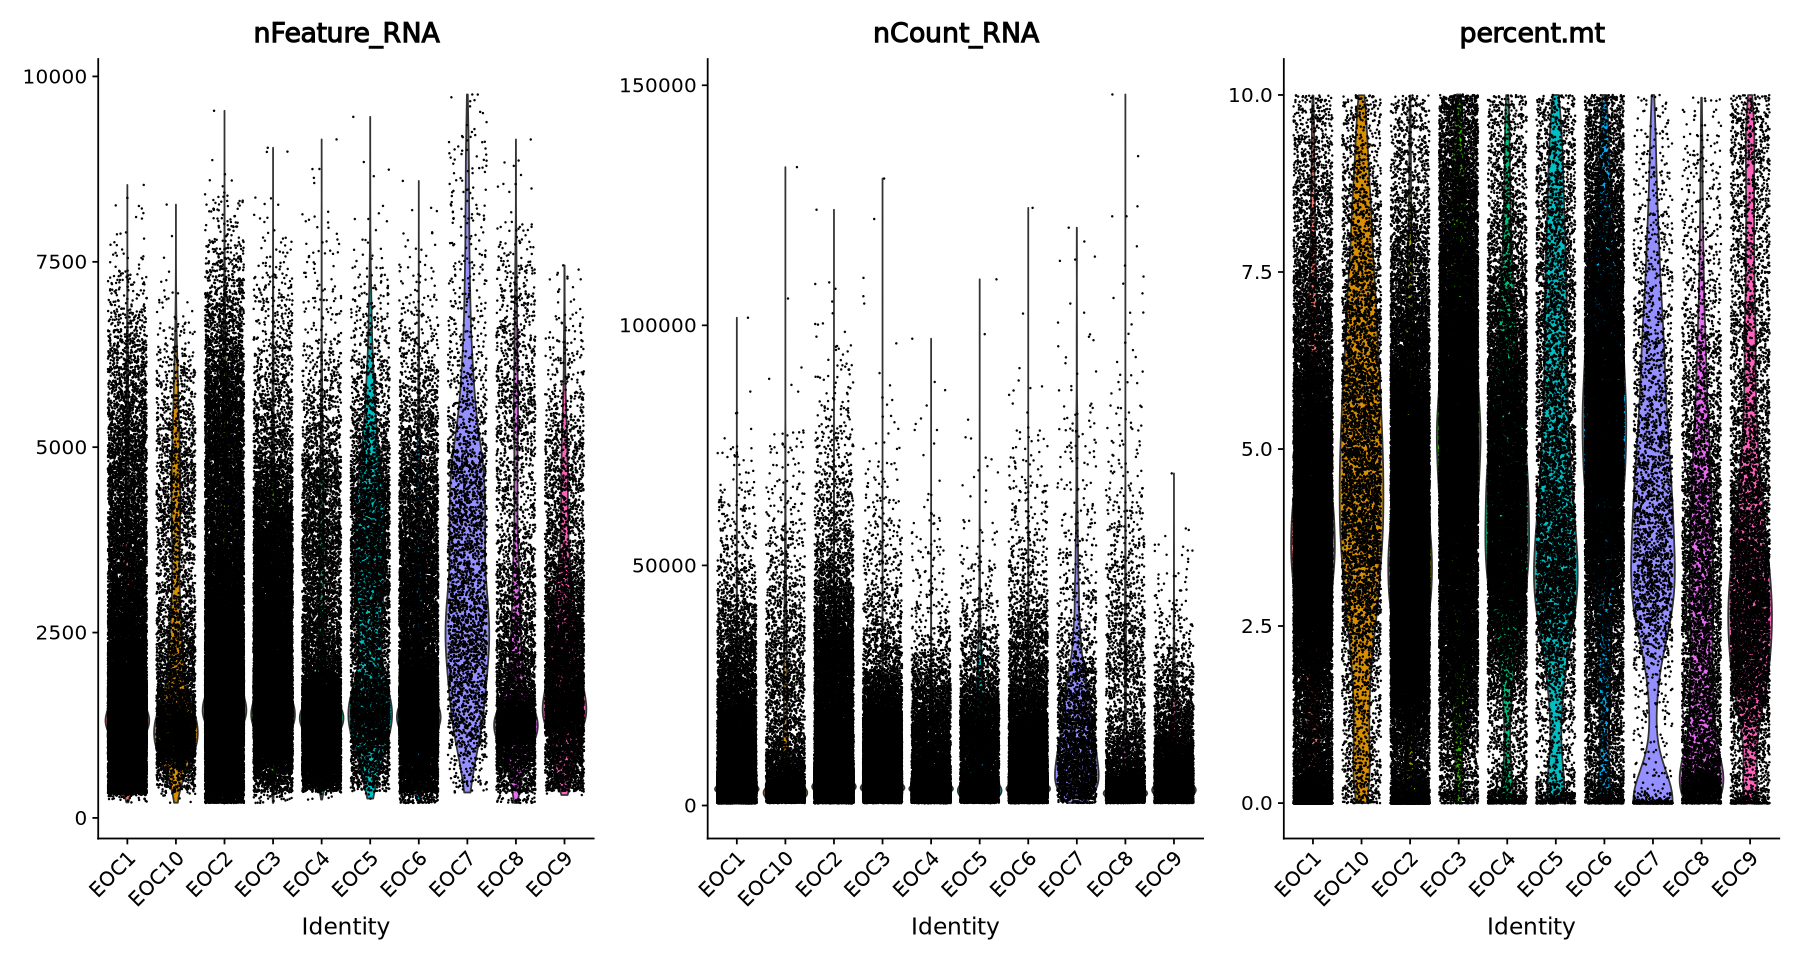

In [19]:
#QC Steps 
HGSOC[["percent.mt"]] <- PercentageFeatureSet(HGSOC, pattern = "^MT-")
#Visualise QC metrics
options(repr.plot.height=8, repr.plot.width=15)
VlnPlot(HGSOC, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3)

In [20]:
#Normalise the data
HGSOC <- NormalizeData(HGSOC)
#Find variable features
HGSOC <- FindVariableFeatures(HGSOC, selection.method = "vst", nfeatures = 2000)
#Scale the data
HGSOC <- ScaleData(HGSOC, vars.to.regress = c("percent.mt", "nCount_RNA"))
#Run pca
HGSOC <- RunPCA(HGSOC, features = VariableFeatures(object = HGSOC))

Normalizing layer: counts

Finding variable features for layer counts

Regressing out percent.mt, nCount_RNA

Centering and scaling data matrix

PC_ 1 
Positive:  SPARC, COL1A2, COL1A1, COL3A1, CALD1, COL6A2, COL5A2, COL6A1, BGN, THY1 
	   AEBP1, DCN, LUM, COL6A3, SERPINH1, PCOLCE, COL5A1, CTHRC1, PTRF, THBS2 
	   FSTL1, MXRA8, MMP2, IGFBP7, CTSK, ANTXR1, PRRX1, C1S, IGFBP4, TPM2 
Negative:  HLA-DPB1, PLEK, LYZ, CD14, CD27, GPR183, PIM2, FCGR3A, MS4A7, S100A9 
	   FCGR2B, LILRB4, CD163, CD69, S100A8, MS4A4A, FCGR1A, LILRB2, VSIG4, FBP1 
	   CLEC10A, FCN1, BCL2A1, MZB1, JAML, FCGR2A, CD38, IGSF6, LINC01272, CD79A 
PC_ 2 
Positive:  TGFBI, FN1, CD14, TMEM176B, C1QC, C1QA, MS4A7, C1QB, FTL, FCGR2A 
	   GPNMB, TMEM176A, PLEK, LILRB4, CD163, CTSL, DAB2, TREM2, VSIG4, APOC1 
	   MS4A4A, MSR1, FCGR3A, FCGR1A, APOE, PLAUR, MMP14, FCGR2B, C5AR1, OLFML2B 
Negative:  WFDC2, KRT18, KRT8, KRT7, KRT19, BCAM, CLDN4, SLPI, CLDN7, TACSTD2 
	   FOLR1, C1orf186, ELF3, CD24, CD9, TM4SF1, C19orf33, KLK8, M

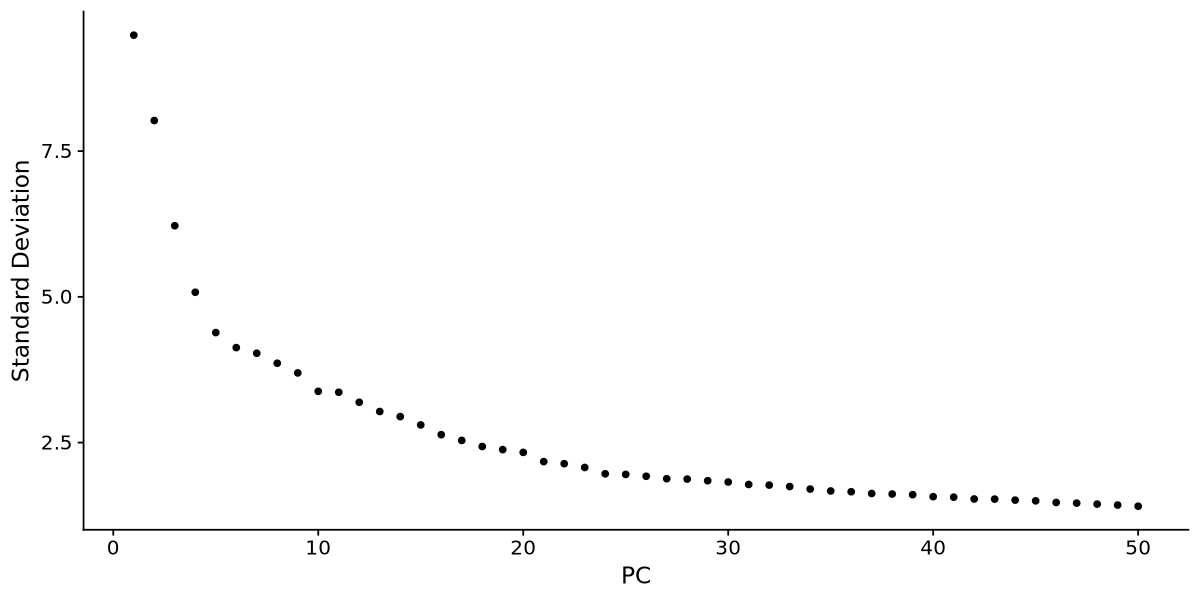

In [21]:
#make elbow plot
options(repr.plot.height=5, repr.plot.width=10)
ElbowPlot(HGSOC, ndims=50)
#in GSE213243 decided to use 40 PC, staying consistent across datasets

In [22]:
#Find neighbours (make sure number matches no. features chosen above)
HGSOC <- FindNeighbors(HGSOC, dims = 1:40)

Computing nearest neighbor graph



Computing SNN



In [23]:
#Run UMAP
HGSOC <- RunUMAP(HGSOC, dims = 1:40)

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
16:16:04 UMAP embedding parameters a = 0.9922 b = 1.112

16:16:04 Read 159682 rows and found 40 numeric columns

16:16:04 Using Annoy for neighbor search, n_neighbors = 30

16:16:04 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

16:16:17 Writing NN index file to temp file /scratch/temp/9236324/Rtmpxj2mAz/file12f4a3718e7c32

16:16:17 Searching Annoy index using 1 thread, search_k = 3000

16:17:06 Annoy recall = 100%

16:17:06 Commencing smooth kNN distance calibration using 1 thread
 with

In [24]:
#Cluster, resolution here set to 0.2
HGSOC <- FindClusters(HGSOC, resolution = 0.2)

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 159682
Number of edges: 5728701

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9719
Number of communities: 25
Elapsed time: 57 seconds


Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



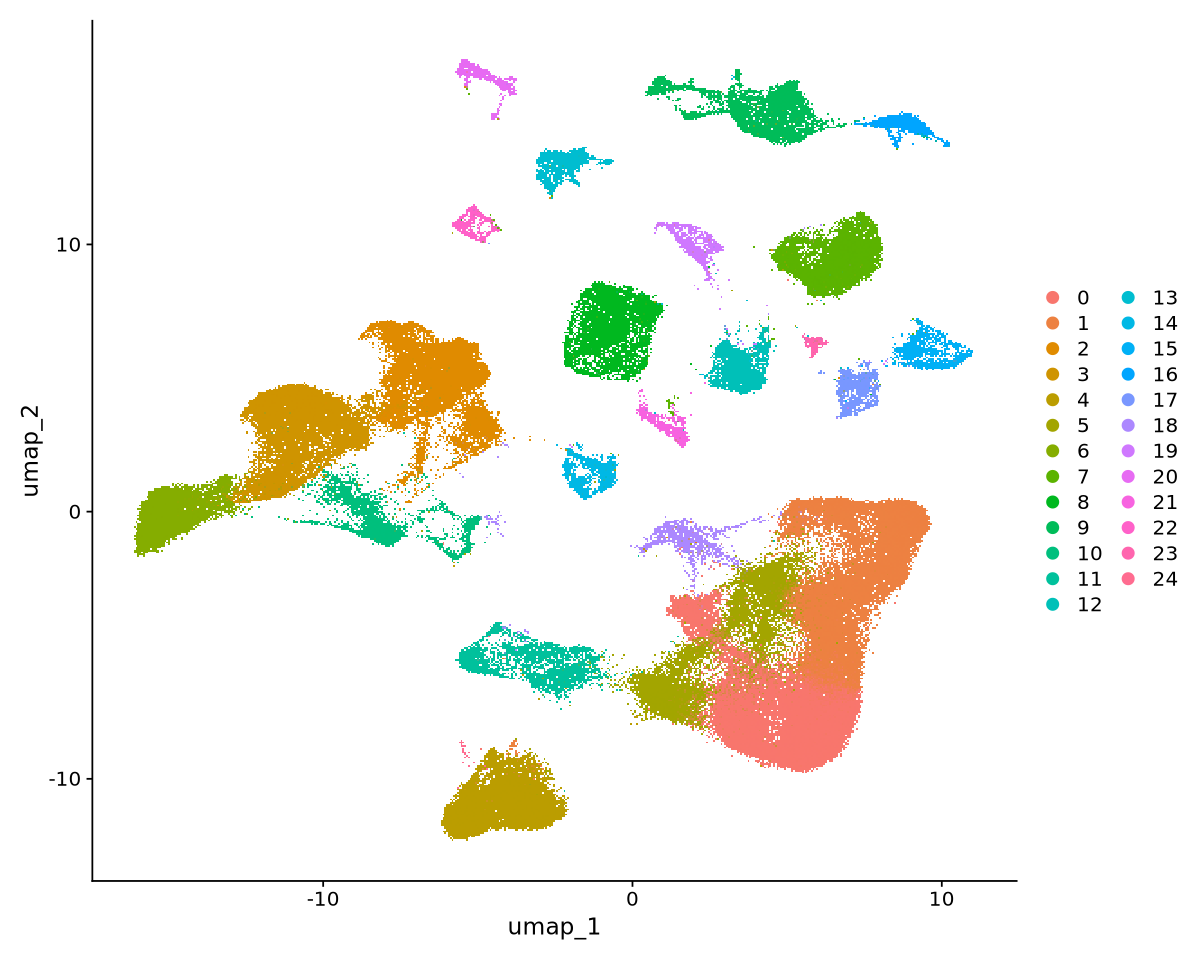

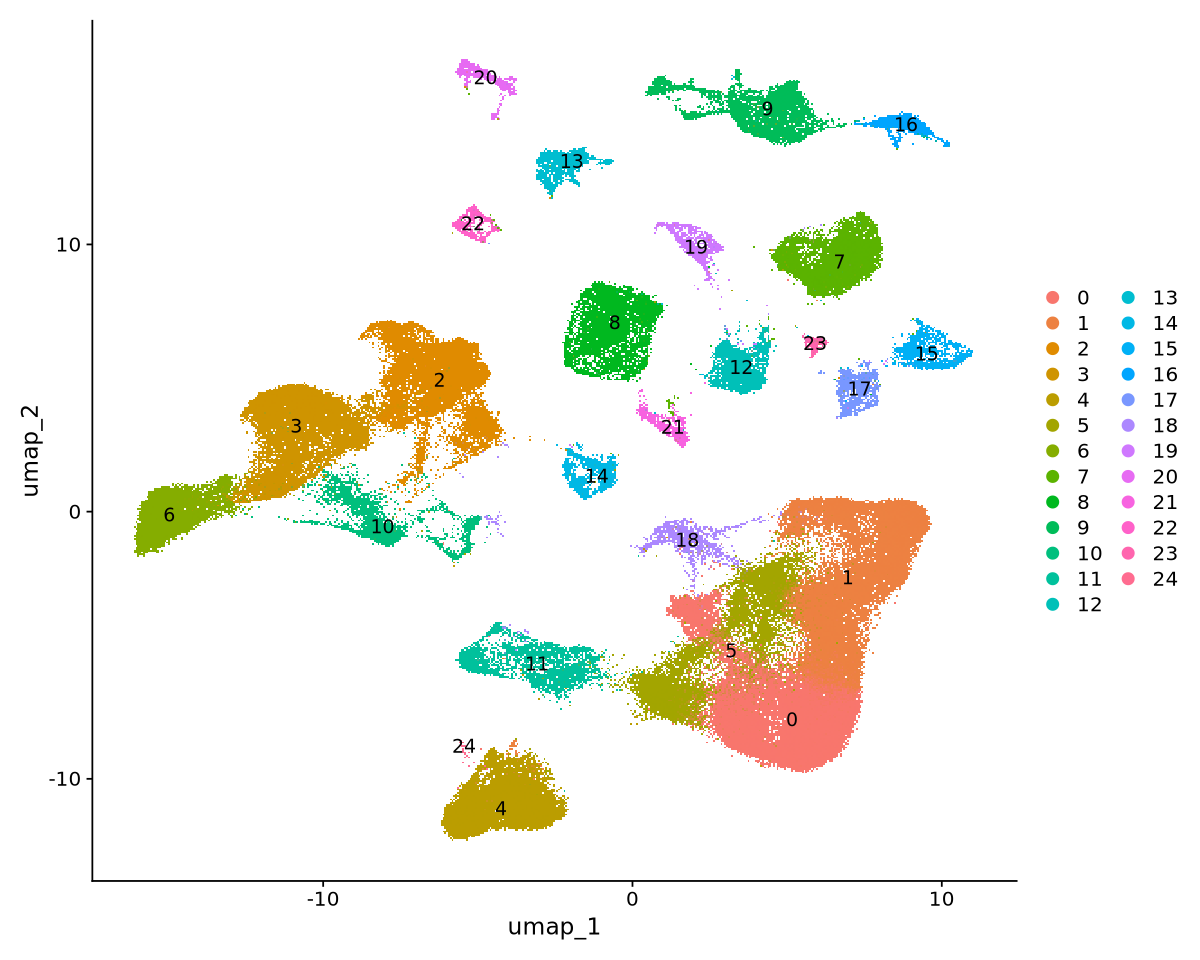

In [25]:
#Plot UMAP
options(repr.plot.height=8, repr.plot.width=10)
DimPlot(HGSOC, reduction = "umap")
DimPlot(HGSOC, reduction = "umap", label=TRUE)

In [26]:
#Save the object at this point so it can be loaded in without running steps above
saveRDS(HGSOC, file = "/scratch/user/s4436039/scdata/PRJCA005422/PRJCA005422_ongoing2.RDS")

In [27]:
HGSOC

An object of class Seurat 
27127 features across 159682 samples within 1 assay 
Active assay: RNA (27127 features, 2000 variable features)
 3 layers present: counts, data, scale.data
 2 dimensional reductions calculated: pca, umap

In [1]:
table(HGSOC$Groups)

ERROR: Error in eval(expr, envir, enclos): object 'HGSOC' not found


In [ ]:
FeaturePlot(object = HGSOC, features = HGSOC$Groups)

ERROR: Error in Summary.factor(structure(c(5L, 5L, 5L, 5L, 5L, 5L, 5L, 5L, 5L, : ‘min’ not meaningful for factors


: 

In [20]:
#Save the object at this point so it can be loaded in without running steps above
saveRDS(OC, file = "/scratch/user/s4436039/scdata/GSE184880/GSE184880.RDS")

#### Next part of code is about determining which cluster is the myeloid cells

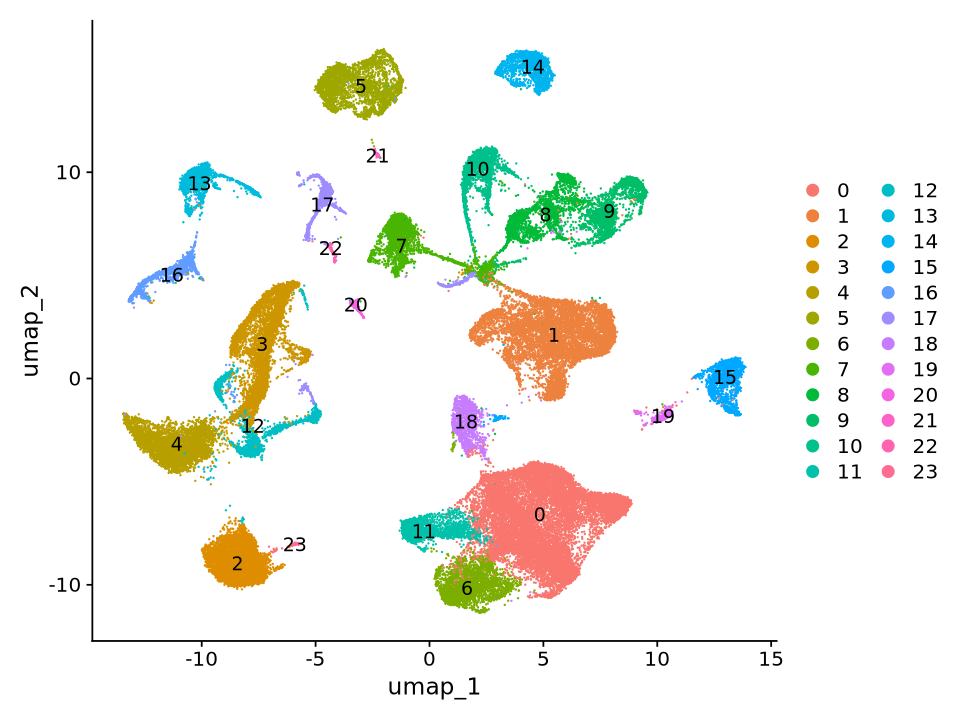

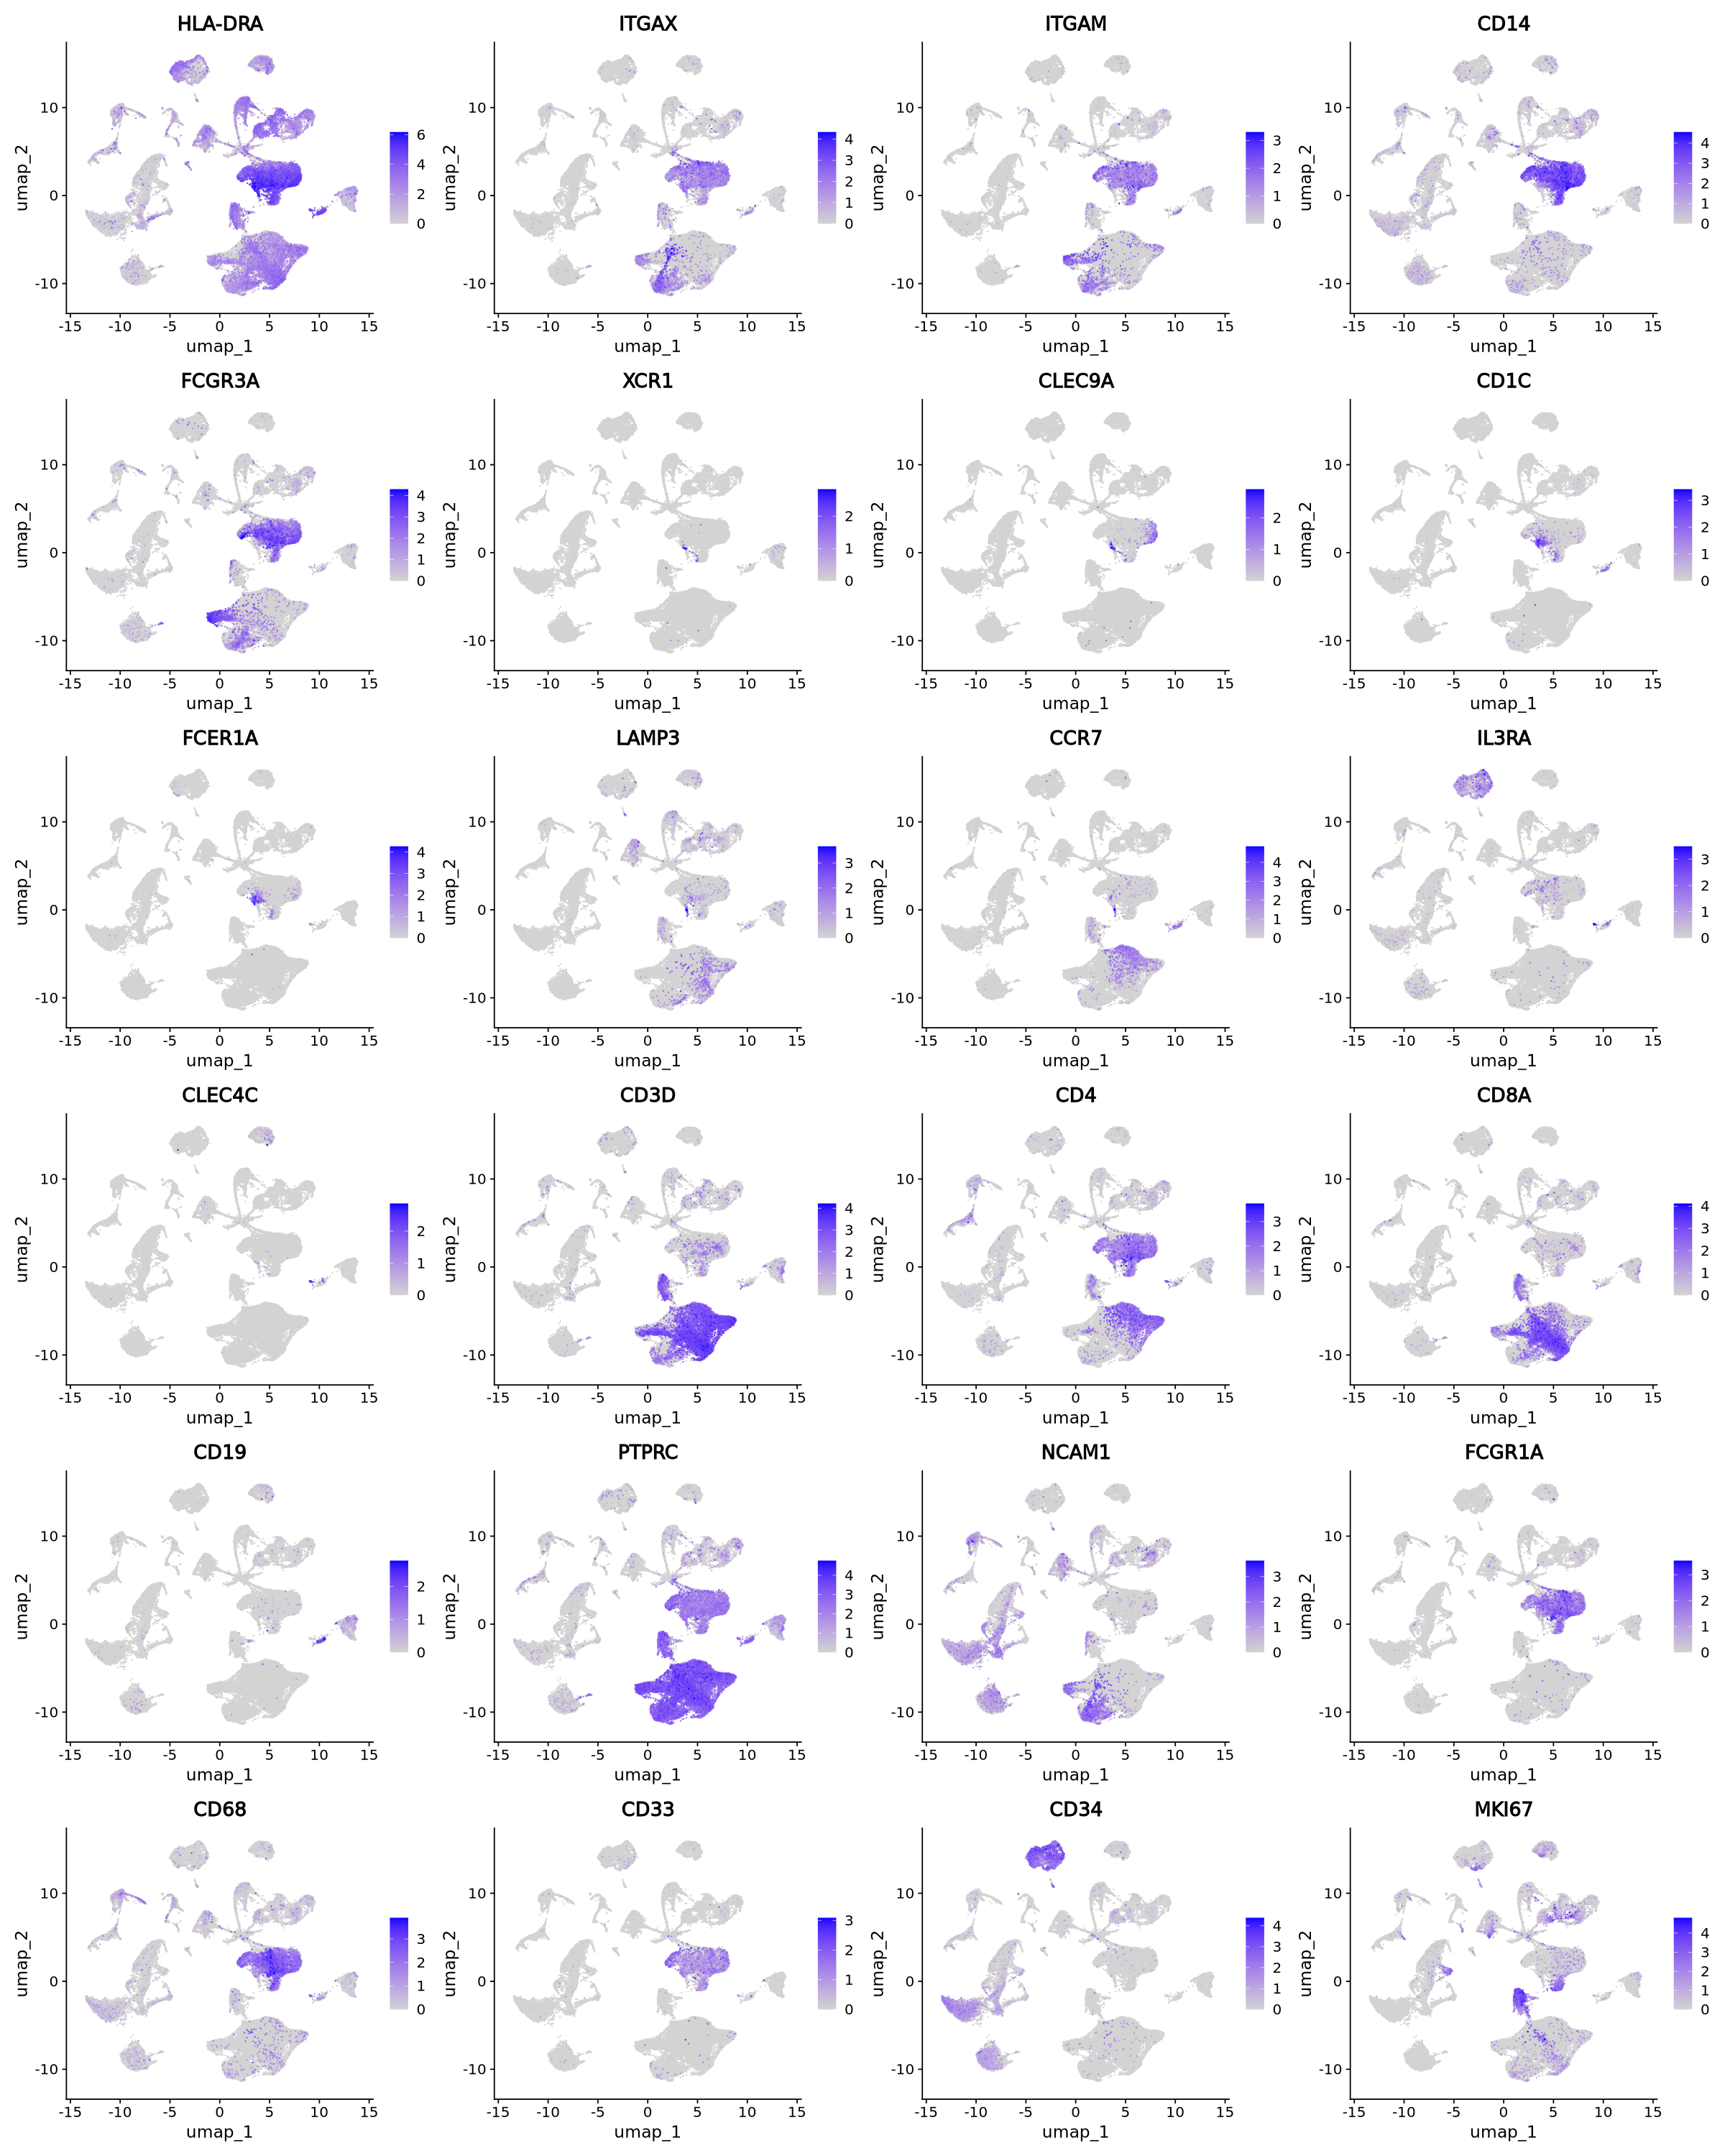

In [27]:
#Same genes over UMAP
options(repr.plot.height=6, repr.plot.width=8)
DimPlot(OC, reduction = "umap", label=TRUE)

options(repr.plot.height=25, repr.plot.width=20)
FeaturePlot(OC, features = c("HLA-DRA", "ITGAX", "ITGAM", "CD14", "FCGR3A", "XCR1", "CLEC9A", "CD1C", "FCER1A", "LAMP3", "CCR7", "IL3RA", "CLEC4C", "CD3D", "CD4", "CD8A", "CD19", "PTPRC", "NCAM1", "FCGR1A", "CD68", "CD33", "CD34", "MKI67"), order = TRUE)

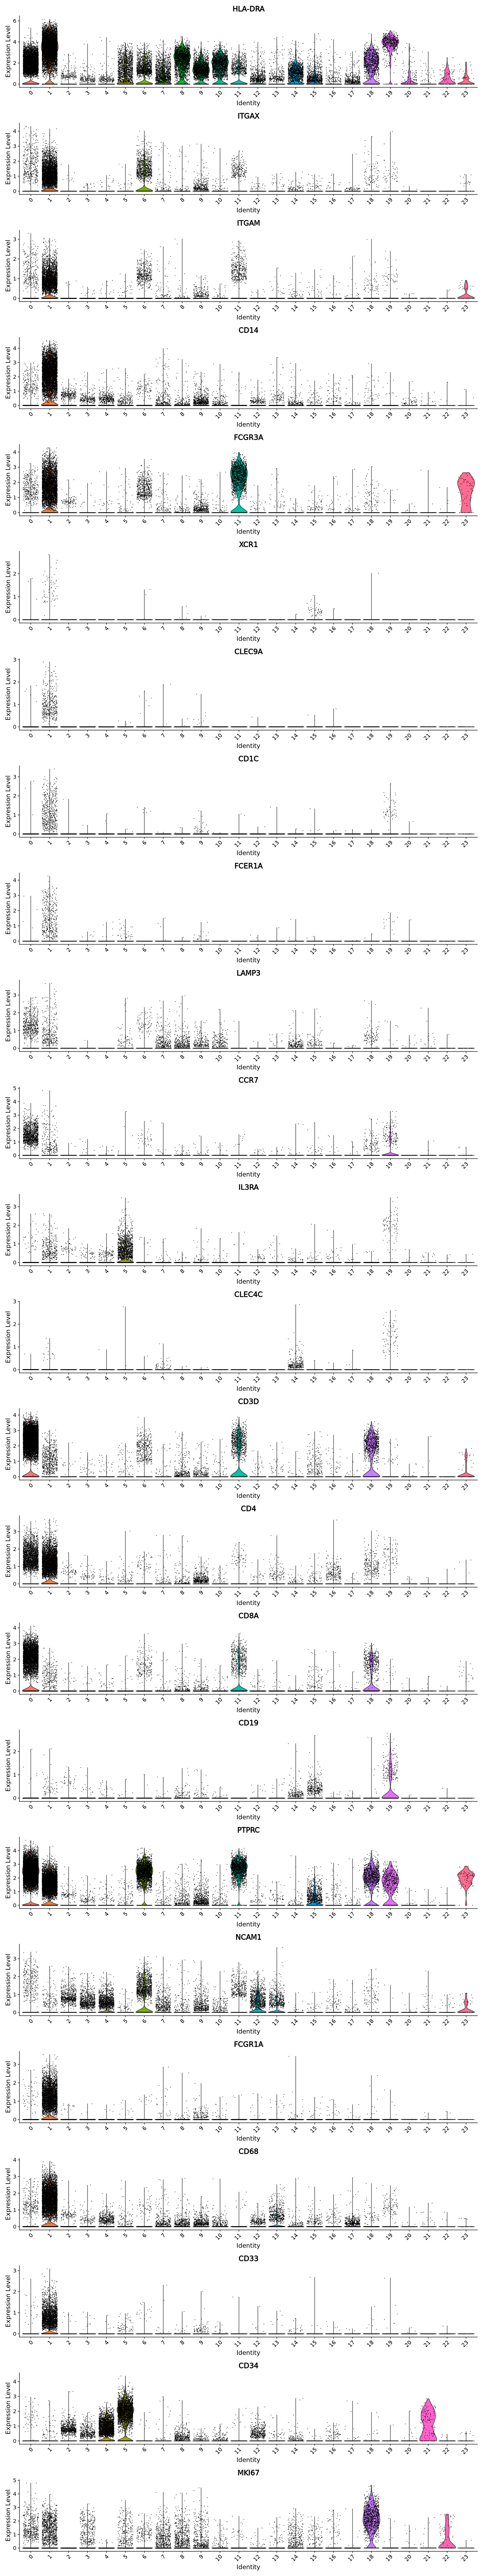

In [29]:
#Violin plots of classic markers
options(repr.plot.height=80, repr.plot.width=15)
VlnPlot(OC, features = c("HLA-DRA", "ITGAX", "ITGAM", "CD14", "FCGR3A", "XCR1", "CLEC9A", "CD1C", "FCER1A", "LAMP3", "CCR7", "IL3RA", "CLEC4C", "CD3D", "CD4", "CD8A", "CD19", "PTPRC", "NCAM1", "FCGR1A", "CD68", "CD33", "CD34", "MKI67"), ncol=1)

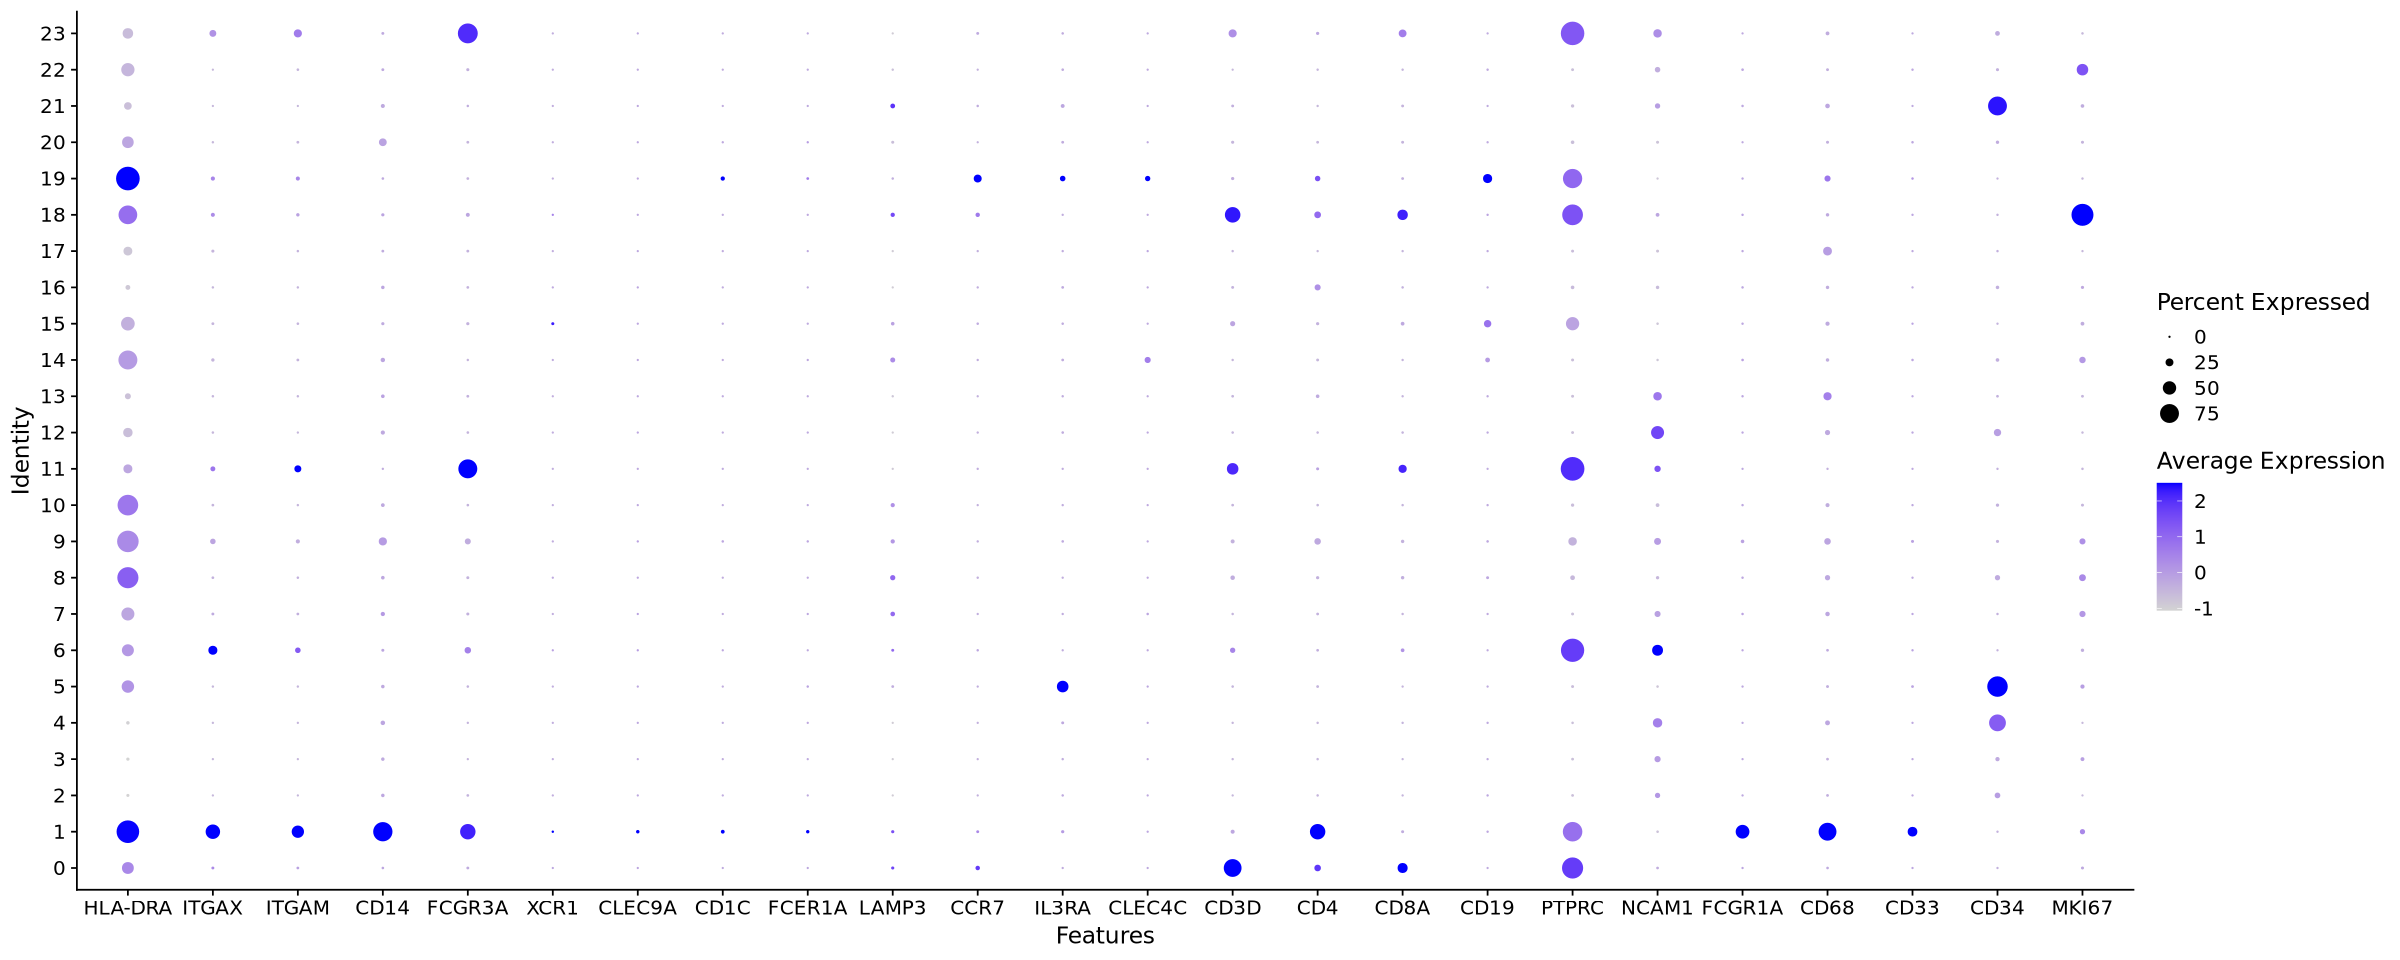

In [31]:
#Same as above but dot plot
options(repr.plot.height=8, repr.plot.width=20)
DotPlot(OC, features = c("HLA-DRA", "ITGAX", "ITGAM", "CD14", "FCGR3A", "XCR1", "CLEC9A", "CD1C", "FCER1A", "LAMP3", "CCR7", "IL3RA", "CLEC4C", "CD3D", "CD4", "CD8A", "CD19", "PTPRC", "NCAM1", "FCGR1A", "CD68", "CD33", "CD34", "MKI67"))

In [ ]:
#For interests sake, plot my sig over full UMAP (this will be done again on myeloid sub-clustering)

#### From above it looks like cluster 1 is the myeloid cells, now subsetting out cluster 1

In [32]:
head(OC@meta.data)

orig.ident nCount_RNA nFeature_RNA
GSE184880_Cancer1_AAACCCAAGTATAGGT-1 GSE184880   4528      1744        
GSE184880_Cancer1_AAACCCACAAGGTACG-1 GSE184880  61565      6280        
GSE184880_Cancer1_AAACCCACACCATAAC-1 GSE184880  31254      6009        
GSE184880_Cancer1_AAACCCACAGCTGCCA-1 GSE184880   9374      2655        
GSE184880_Cancer1_AAACCCACATAACAGA-1 GSE184880   4304      1728        
GSE184880_Cancer1_AAACCCACATGACGGA-1 GSE184880   2659      1246        
                                     sample_type cancer_type patient_id
GSE184880_Cancer1_AAACCCAAGTATAGGT-1 tumour      HGSOC       Cancer1   
GSE184880_Cancer1_AAACCCACAAGGTACG-1 tumour      HGSOC       Cancer1   
GSE184880_Cancer1_AAACCCACACCATAAC-1 tumour      HGSOC       Cancer1   
GSE184880_Cancer1_AAACCCACAGCTGCCA-1 tumour      HGSOC       Cancer1   
GSE184880_Cancer1_AAACCCACATAACAGA-1 tumour      HGSOC       Cancer1   
GSE184880_Cancer1_AAACCCACATGACGGA-1 tumour      HGSOC       Cancer1   
                                     sample_id               percent.mt
GSE184880_Cancer1_AAACCCAAGTATAGGT-1 GSE184880_HGSOC_Cancer1  5.477032 
GSE184880_Cancer1_AAACCCACAAGGTACG-1 GSE184880_HGSOC_Cancer1 38.377325 
GSE184880_Cancer1_AAACCCACACCATAAC-1 GSE184880_HGSOC_Cancer1 12.798362 
GSE184880_Cancer1_AAACCCACAGCTGCCA-1 GSE184880_HGSOC_Cancer1 15.980371 
GSE184880_Cancer1_AAACCCACATAACAGA-1 GSE184880_HGSOC_Cancer1  9.223978 
GSE184880_Cancer1_AAACCCACATGACGGA-1 GSE184880_HGSOC_Cancer1  8.837909 
                                     RNA_snn_res.0.2 seurat_clusters
GSE184880_Cancer1_AAACCCAAGTATAGGT-1 0               0              
GSE184880_Cancer1_AAACCCACAAGGTACG-1 9               9              
GSE184880_Cancer1_AAACCCACACCATAAC-1 9               9              
GSE184880_Cancer1_AAACCCACAGCTGCCA-1 1               1              
GSE184880_Cancer1_AAACCCACATAACAGA-1 6               6              
GSE184880_Cancer1_AAACCCACATGACGGA-1 1               1

In [33]:
myeloid_OC <- subset(OC, subset = RNA_snn_res.0.2 %in% c("1"))

In [34]:
myeloid_OC

An object of class Seurat 
27984 features across 7799 samples within 1 assay 
Active assay: RNA (27984 features, 2000 variable features)
 25 layers present: counts.1, counts.2, counts.3, counts.4, counts.5, counts.6, counts.7, counts.8, counts.9, counts.10, counts.11, counts.12, data.1, data.2, data.3, data.4, data.5, data.6, data.7, data.8, data.9, data.10, data.11, data.12, scale.data
 2 dimensional reductions calculated: pca, umap

In [35]:
saveRDS(myeloid_OC, "/scratch/user/s4436039/scdata/GSE184880/GSE184880_myeloid.RDS")

#### Following the above then need to move entire GSE184880 folder from scratch to rdm
``` bash
rsync -azvhp /scratch/user/s4436039/scdata/GSE184880/ /QRISdata/Q5935/nikita/scdata/GSE184880
```